## Likelihood Ratio Test -- Boston

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [4]:
b = datasets.load_boston() 

bos = pd.DataFrame(b.data)
bos.columns = b.feature_names
X = bos[bos.columns]
bos["PRICE"] = b.target
y = bos["PRICE"]

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Likelihood ratio test (LRT) is a method to test whether a parameter reflects a real constraint (Whether a distribution or model argument $\theta$ equals $\theta_0$ is a true constraint). The idea of likelihood ratio test is: "If the parameter constraint is valid, then the addition of such constraint should not cause a large reduction in the maximum likelihood function. That is to say, the essence of likelihood ratio test is to compare the maximum likelihood function under constraints with the maximum likelihood function without constraints." It can be seen that likelihood ratio test is a general test method (Compared with T test, $\ CHI^2$ test, it has a wider range of application)

Considering the multivariate normal distribution $N_q(\theta,I)$, to test whether $\theta$ equals $\theta_0$, we establish the test problem:

$H_0$ : $\theta$ = $\theta_0$ 
$H_1$ : There is no constraint on $\theta_0$\
Or equivalently $\omega_0$ = {$\theta_0$}, $\omega_1$ = $\ R^q$\
Define $\ L_j^*$ = max$L(X; \theta)$ is the maximum of the likelihood function for each hypothesis. Consider likelihood ratio (LR) :\
$\lambda (X)$ = $\frac{\ L_1^*}{\ L_2^*}$

If the LR value is high, it tends to accept $H_0$, otherwise it tends to accept $H_1$

Likelihood ratio tests are used to evaluate which of the two models is more suitable for current data analysis. Specifically, a relatively complex model is compared with a simple model to see if it fits significantly with a particular data set. If so, the additional parameters of this complex model can be used in future data analysis. A prerequisite for LRT application is that the models to be compared should be hierarchical nested models. Specifically, it means that a complex model only has one or more additional parameters compared to a simple model. Increasing model parameters invariably results in high likelihood scores. Therefore, it is not accurate to judge the fitness of the model according to the level of likelihood value. LRT provides an objective criterion for selecting suitable models. LRT test formula: LR = 2*(INL1-INL2)

Where L1 is the maximum likelihood of the complex model, L2 is the approximate chi-square distribution of the maximum likelihood of the simple standard model LR. In order to test whether the likelihood values of the two models are significantly different, we must consider the degrees of freedom. In the LRT test, the degree of freedom is equal to the number of model parameters added to the complex model. In this way, according to the critical value table of chi-square distribution, we can judge whether the model difference is significant.

In other words, there is a "chimeric relationship" between the two models for comparison. The variables of one model are unconstrained, while the variables of the other model are obtained after the former model is constrained. If the two models are not nested, then LRT cannot be used, but rather the generalized LRT, that is, the relative LR.

Feature Details:
Feature: 0 Corr Prob: 1.0 Inverted: False
Feature: 1 Corr Prob: 1.0 Inverted: True
Feature: 2 Corr Prob: 0.95 Inverted: False
Feature: 3 Corr Prob: 0.95 Inverted: True
Feature: 4 Corr Prob: 0.9 Inverted: False
Feature: 5 Corr Prob: 0.9 Inverted: True
Feature: 6 Corr Prob: 0.85 Inverted: False
Feature: 7 Corr Prob: 0.85 Inverted: True
Feature: 8 Corr Prob: 0.8 Inverted: False
Feature: 9 Corr Prob: 0.8 Inverted: True
Feature: 10 Corr Prob: 0.75 Inverted: False
Feature: 11 Corr Prob: 0.75 Inverted: True
Feature: 12 Corr Prob: 0.7 Inverted: False
Feature: 13 Corr Prob: 0.7 Inverted: True
Feature: 14 Corr Prob: 0.65 Inverted: False
Feature: 15 Corr Prob: 0.65 Inverted: True
Feature: 16 Corr Prob: 0.6 Inverted: False
Feature: 17 Corr Prob: 0.6 Inverted: True
Feature: 18 Corr Prob: 0.5 Inverted: False
Feature: 19 Corr Prob: 0.5 Inverted: True
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Tria

<ipython-input-16-5324c2898db9>:105: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(flname, DPI=200)


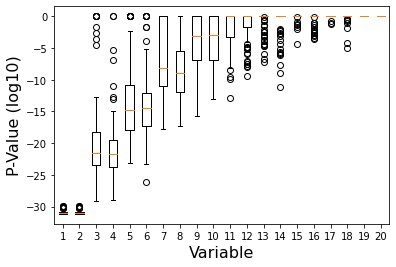

In [16]:
import random

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

N_SAMPLES = 100
N_SIMS = 100
CORR_PROBS = [1.0, -1.0, 0.95, -0.95, 0.9, -0.9, 0.85, -0.85, 0.8, -0.8, 0.75, -0.75, 0.7, -0.7, 0.65, -0.65, 0.6, -0.6, 0.5, -0.5]

def generate_binary_data(n_samples, corr_probs):
    """
    Generate labels and binary features for data from two classes.  The
    probabilities given in `corr_probs` determine the probability that a
    feature's value will agree with the sample's label.  A negative
    probability indicates that the feature's value should be the inverse
    of the label.  For uncorrelated features, use a probability of 0.5.
    Returns a vector of labels and matrix of features.
    """
    n_features = len(corr_probs)
    features = np.zeros((n_samples, n_features))
    labels = np.zeros(n_samples)

    for r in range(n_samples):
        labels[r] = random.randint(0, 1)

            
    for i, p in enumerate(corr_probs):
        inverted = p < 0.
        p = np.abs(p)
        if inverted:
            for r in range(n_samples):
                if random.random() < p:
                    features[r, i] = 1 - labels[r]
                else:
                    features[r, i] = labels[r]
        else:
            for r in range(n_samples):
                if random.random() < p:
                    features[r, i] = labels[r]
                else:
                    features[r, i] = 1 - labels[r]

    return labels, features

def needed_sgd_iter(n_samples):
    """
    Return number of the number of SGD iterations (epochs) needed
    based on the number of samples using advice from
    http://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use
    """
    return max(20,
               int(np.ceil(10**6 / n_samples)))

def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=None):
    """
    Compute the likelihood ratio test for a model trained on the set of features in
    `features_alternate` vs a null model.  If `features_null` is not defined, then
    the null model simply uses the intercept (class probabilities).  Note that
    `features_null` must be a subset of `features_alternative` -- it can not contain
    features that are not in `features_alternate`.
    Returns the p-value, which can be used to accept or reject the null hypothesis.
    """
    labels = np.array(labels)
    features_alternate = np.array(features_alternate)
    
    if features_null:
        features_null = np.array(features_null)
        
#         if features_null.shape[1] >= features_alternate.shape[1]:
#             raise ValueError, "Alternate features must have more features than null features"
        
        lr_model.fit(features_null, labels)
        null_prob = lr_model.predict_proba(features_null)[:, 1]
        df = features_alternate.shape[1] - features_null.shape[1]
    else:
        null_prob = sum(labels) / float(labels.shape[0]) * \
                    np.ones(labels.shape)
        df = features_alternate.shape[1]
    
    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)

    alt_log_likelihood = -log_loss(labels,
                                   alt_prob,
                                   normalize=False)
    null_log_likelihood = -log_loss(labels,
                                    null_prob,
                                    normalize=False)

    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = chi2.sf(G, df)

    return p_value

def plot_pvalues(flname, p_values, title):
    log_p_values = np.log10(p_values)
    plt.clf()
    plt.boxplot(x=log_p_values)
    plt.xlabel("Variable", fontsize=16)
    plt.ylabel("P-Value (log10)", fontsize=16)
    plt.title(title, fontsize=18)
    plt.savefig(flname, DPI=200)

if __name__ == "__main__":
    # burn in
    for i in range(100):
        random.random()


    model = SGDClassifier(loss="log",
                          penalty="l2")
                          #n_iter=needed_sgd_iter(N_SAMPLES))

    print("Feature Details:")
    for i in range(len(CORR_PROBS)):
        inverted = CORR_PROBS[i] < 0.
        print("Feature:", i, "Corr Prob:", np.abs(CORR_PROBS[i]), "Inverted:", inverted)


    feature_log_p_values = np.zeros((N_SIMS, len(CORR_PROBS)))
    for j in range(N_SIMS):
        labels, features = generate_binary_data(N_SAMPLES, CORR_PROBS)

        print("Trial:", (j+1))
        for i in range(len(CORR_PROBS)):
            # force into Nx1 matrix
            column = features[:, i].reshape(-1, 1)
            p_value = likelihood_ratio_test(column,
                                            labels,
                                            model)
            feature_log_p_values[j, i] = p_value
            #inverted = CORR_PROBS[i] < 0.
            #print "Feature:", i, "Corr Prob:", np.abs(CORR_PROBS[i]), "Inverted:", inverted, "Likelihood Ratio Test p-value:", p_value

    plot_pvalues("p_values_boxplot.png",
                 feature_log_p_values,
                 "")